In [1]:
import numpy as np

## 使用numpy中的 linalg来进行svd分解
svd分解： $$ Data_{m \times n} = U_{m \times m} \Sigma_{m \times n} V^T_{n \times n} $$
其中 $ U_{m \times m} $ 中为左奇异向量，前 $ r $ 个即为所求， $ \Sigma_{m \times n} $ 中对角线上值为奇异值，其余值为0，一般对角线上的值按从大到小排序，且前 $ r $ 个奇异值之和占据整个奇异值之和的大部分，$ r $ 个之后的可置为0，视为噪声或冗余特征。

## 1.特征值分解(EVD)
### 实对称矩阵
在理解奇异值分解之前 需要先回顾一下特征值分解 如果矩阵A是一个m * m的实对称矩阵即($A = A^T$)，那么它可以被分解成如下的形式:
$$A = Q\sum Q^T = Q\begin{pmatrix}
               \lambda _1 & \cdots & \cdots & \cdots \\
               \cdots & \lambda _2 & \cdots & \cdots \\
               \cdots & \cdots & \lambda _3 & \cdots \\
               \cdots & \cdots & \cdots & \lambda _4 \\
             \end{pmatrix} Q^T .......................................................(1-1)$$                           
             
其中Q^T为标准正交阵 即有$QQ^T = I$ $\sum$为对角矩阵 且上面的矩阵的维度均为m * m.$\lambda_i$称为特征值，$q_i$是Q(特征矩阵)中的列向量 称为特征向量


## 一般矩阵
上面的特征值分解，对矩阵有着较高的要求，它需要被分解的矩阵A为实对称矩阵，但是现实中，我们所遇到的问题一般不是实对称矩阵。那么当我们碰到一般性的矩阵，即有一个m×n的矩阵A，它是否能被分解成上面的式（1-1）的形式呢？当然是可以的，这就是我们下面要讨论的内容。

## 2 奇异值分解
###  奇异值分解的定义
有一个m×n的实数矩阵A，我们想要把它分解成如下的形式
$$ A = U \sum V^T .................................................（2-1)$$
其中U和V均为单位正交阵，即有$UU^T = I$ 和 $VV^T = I$,U称为左奇异矩阵，V称为右奇异矩阵 $\sum$仅在主对角线上有值，我们称它为奇异值，其他元素均为0 上面矩阵的维度分别是$U \in R^{m*m},\sum \in R^{m*n}, V\in R^{n*n}$
一般地 $\sum$有如下形式:
$$ \sum = \begin{pmatrix}
         \sigma _1 & 0 & 0 & 0 & 0 \\
         0 & \sigma _2 & 0 & 0 & 0 \\
         0 & 0 & \ddots & 0 & 0    \\
         0 & 0 & 0 & \ddots & 0 & 0 \\
         \end{pmatrix}_{m * n } $$


<img src=./svd/1.png width=640 height=640 \>
<img src=./svd/2.png width=640 height=640 \>
<img src=./svd/3.png width=640 height=640 \>
<img src=./svd/4.png width=640 height=640 \>

In [2]:
U, Sigma, VT = np.linalg.svd([[1,1],[7,7]])
print('U:', U)
print('Sigma:', Sigma)
print('VT:', VT)

U: [[-0.14142136 -0.98994949]
 [-0.98994949  0.14142136]]
Sigma: [1.00000000e+01 2.82797782e-16]
VT: [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [3]:
def loadExData():
    '''加载数据'''
    return [[1,1,1,0,0],
            [2,2,2,0,0],
            [1,1,1,0,0],
            [5,5,5,0,0],
            [1,1,0,2,2],
            [0,0,0,3,3],
            [0,0,0,1,1]]

In [4]:
Data = loadExData()
U, Sigma, VT = np.linalg.svd(Data)
Sigma

array([9.72140007e+00, 5.29397912e+00, 6.84226362e-01, 4.11502614e-16,
       1.36030206e-16])

可以看到奇异值中前3个数值较大，而后两个太小。于是取前三个近似表示数据集矩阵 $ Data $:
$$ Data_{m \times n} \approx U_{m \times 3} \Sigma_{3 \times 3} V^T_{3 \times r} $$

尝试重构原始矩阵:

In [5]:
Sig3 = np.mat([[Sigma[0],0,0],[0,Sigma[1],0],[0,0,Sigma[2]]])
Data_s = U[:,:3] * Sig3 * VT[:3,:]
Data_s

matrix([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          7.75989921e-16,  7.71587483e-16],
        [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
          3.00514919e-16,  2.77832253e-16],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          2.18975112e-16,  2.07633779e-16],
        [ 5.00000000e+00,  5.00000000e+00,  5.00000000e+00,
          3.00675663e-17, -1.28697294e-17],
        [ 1.00000000e+00,  1.00000000e+00, -5.48397422e-16,
          2.00000000e+00,  2.00000000e+00],
        [ 3.21319929e-16,  4.43562065e-16, -3.48967188e-16,
          3.00000000e+00,  3.00000000e+00],
        [ 9.71445147e-17,  1.45716772e-16, -1.52655666e-16,
          1.00000000e+00,  1.00000000e+00]])

# 小例子：基于协同过滤的推荐引擎
利用用户的评价来进行物品之间相似度的计算。<br>
评价矩阵: $$ \begin{bmatrix} x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\ x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\ \vdots & \vdots & \ddots & \vdots \\ x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} \\ \end{bmatrix}$$
其中 $ m $ 表示用户数， $ n $ 表示物品数
（1）欧氏距离(物品 $ x_i 与 x_j $ )
$$ dist = \sqrt{(x_i^{(1)} - x_j^{(1)})^2 + x_i^{(2)} - x_j^{(2)})^2 + ... + x_i^{(m)} - x_j^{(m)})^2} $$ 
（2）皮尔逊相关系数
使用numpy中的numpy.corrcoef()来计算，由于皮尔逊系数的取值在 $ [-1,1] $ 之间，因此用 $ 0.5 + 0.5*np.corrcoef() $ 将值映射到 $ [0,1] $
（3）余弦相似度
$$ \cos \theta = \frac{A \cdot B}{|| A || || B ||} $$
余弦相似度取值范围也是 $ [-1,1] $ ，因此使用2范数将值映射到 $ [0,1] $ 。 $ 向量[4,2,2]的 2范数=\sqrt{4^2 + 2^2 + 2^2} $

In [29]:
def euclidSim(inA, inB):
    '''欧氏距离'''
    return 1.0 / (1.0 + np.linalg.norm(inA - inB))

def pearsSim(inA, inB):
    '''皮尔逊相关系数'''
    # 二维或一维情况下，点A与点B可以确定一条直线
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * np.corrcoef(inA, inB, rowvar = 0)[0][1]

def cosSim(inA, inB):
    '''余弦相似度'''
    num = np.sum(inA.T * inB)
    denom = np.linalg.norm(inA) * np.linalg.norm(inB)
    return 0.5 + 0.5 * (num / denom)

In [30]:
DataMat = np.mat(loadExData())
print("第0个变量与第0个变量的欧氏距离：", euclidSim(DataMat[:,0], DataMat[:,0]))
print("第0个变量与第4个变量的欧氏距离：", euclidSim(DataMat[:,0], DataMat[:,4]))
print("第0个变量与第0个变量的皮尔逊相关系数：", pearsSim(DataMat[:,0], DataMat[:,0]))
print("第0个变量与第4个变量的皮尔逊相关系数：", pearsSim(DataMat[:,0], DataMat[:,4]))
print("第0个变量与第0个变量的余弦相似度：", cosSim(DataMat[:,0], DataMat[:,0]))
print("第0个变量与第4个变量的余弦相似度：", cosSim(DataMat[:,0], DataMat[:,4]))

第0个变量与第0个变量的欧氏距离： 1.0
第0个变量与第4个变量的欧氏距离： 0.13367660240019172
第0个变量与第0个变量的皮尔逊相关系数： 1.0
第0个变量与第4个变量的皮尔逊相关系数： 0.23768619407595815
第0个变量与第0个变量的余弦相似度： 0.9999999999999999
第0个变量与第4个变量的余弦相似度： 0.5472455591261534


In [39]:
def standEst(dataMat, user, simMeas, item):
    '''估计评分值（使用其他用户已经评价过的物品与待预测item进行相似度计算）
    Args:
        dataMat: 数据集
        user: 待预测用户
        simMeas: 相似度计算方法
        item: 待预测评分的物品
    Return:
        某个物品的预测评分
    '''
    n = np.shape(dataMat)[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0:
            continue
        # 寻找两个用户都评价过的物品
        overlap = np.nonzero(np.logical_and(dataMat[:,item].A>0, dataMat[:,j].A>0))[0]
        if len(overlap) == 0: similarity = 0
        else: similarity = simMeas(dataMat[overlap, item], dataMat[overlap, j])
        print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal / simTotal


In [40]:
def recommend(dataMat, user, N=3, simMeas=cosSim, estMethod=standEst):
    '''推荐引擎'''
    # 找到未评级的物品
    unratedItems = np.nonzero(dataMat[user,:].A==0)[1]
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj:jj[1], reverse=True)[:N]

In [41]:
myMat = [[4,4,0,2,2],
            [4,0,0,3,3],
            [4,0,0,1,1],
            [1,1,1,2,0],
            [2,2,2,0,0],
            [1,1,1,0,0],
            [5,5,5,0,0]]
myMat = np.mat(myMat)
myMat

matrix([[4, 4, 0, 2, 2],
        [4, 0, 0, 3, 3],
        [4, 0, 0, 1, 1],
        [1, 1, 1, 2, 0],
        [2, 2, 2, 0, 0],
        [1, 1, 1, 0, 0],
        [5, 5, 5, 0, 0]])

In [42]:
recommend(myMat, 2)

the 1 and 0 similarity is: 1.000000
the 1 and 3 similarity is: 0.928746
the 1 and 4 similarity is: 1.000000
the 2 and 0 similarity is: 1.000000
the 2 and 3 similarity is: 1.000000
the 2 and 4 similarity is: 0.000000


[(2, 2.5), (1, 2.0243290220056256)]

In [43]:
def loadExData2():
    return[[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5],
           [0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 3],
           [0, 0, 0, 0, 4, 0, 0, 1, 0, 4, 0],
           [3, 3, 4, 0, 0, 0, 0, 2, 2, 0, 0],
           [5, 4, 5, 0, 0, 0, 0, 5, 5, 0, 0],
           [0, 0, 0, 0, 5, 0, 1, 0, 0, 5, 0],
           [4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 1],
           [0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4],
           [0, 0, 0, 2, 0, 2, 5, 0, 0, 1, 2],
           [0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]]

In [45]:
U,Sigma,VT=np.linalg.svd(np.mat(loadExData2()))
myMat=np.mat(loadExData2())

In [47]:
Sig2=Sigma**2
sum_Sig2 = np.sum(Sig2)
print('Sigma平方和:',sum_Sig2)
sumSig29 = np.sum(Sig2)*0.9
print('Sigma平方和的90%:',sumSig29)
print('S前两个Sigma和:',np.sum(Sig2[:2]))
print('S前三个Sigma和:',np.sum(Sig2[:3]))

Sigma平方和: 541.9999999999995
Sigma平方和的90%: 487.7999999999996
S前两个Sigma和: 378.8295595113579
S前三个Sigma和: 500.5002891275793


In [50]:
def svdEst(dataMat, user, simMeas, item):
    '''基于SVD的评分估计'''
    n = np.shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    U,Sigma,VT = np.linalg.svd(dataMat)
    # 建立对角矩阵
    Sig4 = np.mat(np.eye(4)*Sigma[:4]) 
    # 构建转换后的物品
    xformedItems = dataMat.T * U[:,:4] * Sig4.I  
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T,\
                             xformedItems[j,:].T)
        print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [51]:
recommend(myMat, 1, estMethod=svdEst)

the 0 and 3 similarity is: 0.490950
the 0 and 5 similarity is: 0.484274
the 0 and 10 similarity is: 0.512755
the 1 and 3 similarity is: 0.491294
the 1 and 5 similarity is: 0.481516
the 1 and 10 similarity is: 0.509709
the 2 and 3 similarity is: 0.491573
the 2 and 5 similarity is: 0.482346
the 2 and 10 similarity is: 0.510584
the 4 and 3 similarity is: 0.450495
the 4 and 5 similarity is: 0.506795
the 4 and 10 similarity is: 0.512896
the 6 and 3 similarity is: 0.743699
the 6 and 5 similarity is: 0.468366
the 6 and 10 similarity is: 0.439465
the 7 and 3 similarity is: 0.482175
the 7 and 5 similarity is: 0.494716
the 7 and 10 similarity is: 0.524970
the 8 and 3 similarity is: 0.491307
the 8 and 5 similarity is: 0.491228
the 8 and 10 similarity is: 0.520290
the 9 and 3 similarity is: 0.522379
the 9 and 5 similarity is: 0.496130
the 9 and 10 similarity is: 0.493617


[(4, 3.3447149384692283), (7, 3.329402072452697), (9, 3.328100876390069)]

In [52]:
recommend(myMat, 1, estMethod=svdEst, simMeas=pearsSim)

the 0 and 3 similarity is: 0.341942
the 0 and 5 similarity is: 0.124132
the 0 and 10 similarity is: 0.116698
the 1 and 3 similarity is: 0.345560
the 1 and 5 similarity is: 0.126456
the 1 and 10 similarity is: 0.118892
the 2 and 3 similarity is: 0.345149
the 2 and 5 similarity is: 0.126190
the 2 and 10 similarity is: 0.118640
the 4 and 3 similarity is: 0.450126
the 4 and 5 similarity is: 0.528504
the 4 and 10 similarity is: 0.544647
the 6 and 3 similarity is: 0.923822
the 6 and 5 similarity is: 0.724840
the 6 and 10 similarity is: 0.710896
the 7 and 3 similarity is: 0.319482
the 7 and 5 similarity is: 0.118324
the 7 and 10 similarity is: 0.113370
the 8 and 3 similarity is: 0.334910
the 8 and 5 similarity is: 0.119673
the 8 and 10 similarity is: 0.112497
the 9 and 3 similarity is: 0.566918
the 9 and 5 similarity is: 0.590049
the 9 and 10 similarity is: 0.602380


[(4, 3.3469521867021736), (9, 3.3353796573274703), (6, 3.307193027813037)]

## 基于SVD图像的压缩

In [53]:
def printMat(inMat, thresh=0.8):
    for i in range(32):
        for k in range(32):
            if float(inMat[i,k]) > thresh:
                print(1, end=''),
            else: print(0, end=''),
        print('') 

def imgCompress(numSV=3, thresh=0.8):
    myl = []
    for line in open('0_5.txt').readlines():
        newRow = []
        for i in range(32):
            newRow.append(int(line[i]))
        myl.append(newRow)
    myMat = np.mat(myl)
    print("****original matrix******")
    printMat(myMat, thresh)
    U,Sigma,VT = np.linalg.svd(myMat)
    SigRecon = np.mat(np.zeros((numSV, numSV)))
    for k in range(numSV):#construct diagonal matrix from vector
        SigRecon[k,k] = Sigma[k]
    reconMat = U[:,:numSV]*SigRecon*VT[:numSV,:]
    print("****reconstructed matrix using %d singular values******" % numSV)
    printMat(reconMat, thresh)

In [54]:
imgCompress(2)

****original matrix******
00000000000000110000000000000000
00000000000011111100000000000000
00000000000111111110000000000000
00000000001111111111000000000000
00000000111111111111100000000000
00000001111111111111110000000000
00000000111111111111111000000000
00000000111111100001111100000000
00000001111111000001111100000000
00000011111100000000111100000000
00000011111100000000111110000000
00000011111100000000011110000000
00000011111100000000011110000000
00000001111110000000001111000000
00000011111110000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000001111100000000011111000000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000011111000000
00000000111110000000111111000000
00000000111111000001111110000000
00000000011111111111111110000000
00000000001111111111111110000000
00000000001111111111111110000000
00000000000111111

SVD（奇异值分解）：
优点：简化数据，去除噪声点，提高算法的结果；
缺点：数据的转换可能难以理解；
适用于数据类型：数值型。

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
 
img_eg = mpimg.imread("./svd/beauty.jpg")
print(img_eg.shape)

(1080, 1080, 3)


In [5]:
###奇异值分解
img_temp = img_eg.reshape(1080, 1080 * 3)
U,Sigma,VT = np.linalg.svd(img_temp)

In [6]:
#我们先将图片变成1080×3240，再做奇异值分解。从svd函数中得到的奇异值sigma它是从大到小排列的。
# 取前60个奇异值
sval_nums = 60
img_restruct1 = (U[:,0:sval_nums]).dot(np.diag(Sigma[0:sval_nums])).dot(VT[0:sval_nums,:])
img_restruct1 = img_restruct1.reshape(1080,1080,3)
 
# 取前120个奇异值
sval_nums = 120
img_restruct2 = (U[:,0:sval_nums]).dot(np.diag(Sigma[0:sval_nums])).dot(VT[0:sval_nums,:])
img_restruct2 = img_restruct2.reshape(1080,1080,3)


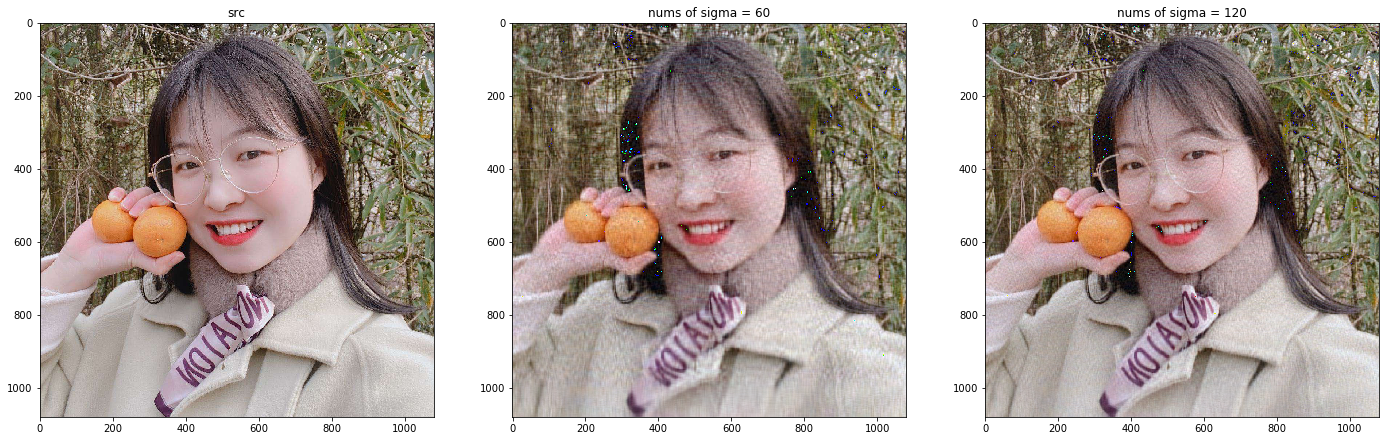

In [7]:
fig, ax = plt.subplots(1,3,figsize = (24,32))
 
ax[0].imshow(img_eg)
ax[0].set(title = "src")
ax[1].imshow(img_restruct1.astype(np.uint8))
ax[1].set(title = "nums of sigma = 60")
ax[2].imshow(img_restruct2.astype(np.uint8))
ax[2].set(title = "nums of sigma = 120")

# 自己实现奇异值分解
<img src="./svd/5.png" width=640 height =640 />
<img src="./svd/6.png" width=640 height =640 />
<img src="./svd/7.png" width=640 height =640 />

In [8]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
 
# 读取数据
train_data_mat = loadmat("./svd/train_data2.mat")
train_data = train_data_mat["Data"]
print(train_data.shape)

(1000, 3072)


In [9]:
#特征值分解
# 数据必需先转为浮点型，否则在计算的过程中会溢出，导致结果不准确
train_dataFloat = train_data / 255.0
# 计算特征值和特征向量
eval_sigma1,evec_u = np.linalg.eigh(train_dataFloat.dot(train_dataFloat.T))


In [10]:
#计算右奇异矩阵
#降序排列后，逆序输出
eval1_sort_idx = np.argsort(eval_sigma1)[::-1]
# 将特征值对应的特征向量也对应排好序
eval_sigma1 = np.sort(eval_sigma1)[::-1]
evec_u = evec_u[:,eval1_sort_idx]
# 计算奇异值矩阵的逆
eval_sigma1 = np.sqrt(eval_sigma1)
eval_sigma1_inv = np.linalg.inv(np.diag(eval_sigma1))
# 计算右奇异矩阵
evec_part_v = eval_sigma1_inv.dot((evec_u.T).dot(train_dataFloat))

上面的计算出的evec_u, eval_sigma1, evec_part_v分别为左奇异矩阵，所有奇异值，右奇异矩阵。

In [ ]:
SVD与特征值分解（EVD）非常类似，应该说EVD只是SVD的一种特殊怀况。
我们可以通过它们在实际的应用中返过来理解特征值/奇异值的含义：特征值/奇异值代表着数据的信息量，它的值越大，信息越多。